In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import distr
import common
import plots

In [6]:
import model_gaussian
model = model_gaussian
model_name = 'gaussian'

In [7]:
science_ndata = 20
science_theta_nature = 0.5

In [8]:
def collect_data(phi,ndata):
    print 'Taking Data...'
    
    theta_nature = -0.5
    return common.collect_data(phi,model.THE_SIMULATOR, theta_nature=science_theta_nature,n_samples = ndata)

In [9]:
def calculate_posterior(prior,data,phi):
    print 'Calculate Posterior...'
    
    posterior = common.calculate_posterior(
                            prior,data,phi,
                            lnprob_args = model.model_details_likelihood_settings,
                            n_chainlen = 50
    )
    maximum_a_post = posterior.map(model.model_details_map_bins)
    
    print 'Best Theta: ', maximum_a_post
    return posterior, maximum_a_post

In [10]:
def design_next_experiment(prior):
    print 'Design Next Experiment...'
    
    eig_kwargs = {'emcee_kwargs' : {
                      'n_chainlen': 50,
                      'lnprob_args': model.model_details_likelihood_settings},
                  'sim_n_data': science_ndata,
                  'map_bins': model.model_details_map_bins}
    res_gp   = common.design_next_experiment_bayesopt(prior,model.PHI_RANGE,eig_kwargs, n_totalcalls = 7)
    res_next_phi = res_gp[0].x
    
    print 'Next Phi: ', res_next_phi
    return res_gp,res_next_phi

# Running the Science Loop

Taking Data...
Calculate Posterior...
Best Theta:  0.3
Design Next Experiment...
2017-06-08 18:53:40.468652 EIG via 4 parallel experiments with [theta,phi] 0.3 5.80217903408
2017-06-08 18:53:52.331899 EIG via 4 parallel experiments with [theta,phi] 0.3 3.28339349505
2017-06-08 18:54:03.636831 EIG via 4 parallel experiments with [theta,phi] 0.3 5.83610615979
2017-06-08 18:54:15.217634 EIG via 4 parallel experiments with [theta,phi] 0.3 4.28889596205
2017-06-08 18:54:26.458641 EIG via 4 parallel experiments with [theta,phi] 0.3 4.18637294758
2017-06-08 18:54:38.221030 EIG via 4 parallel experiments with [theta,phi] 0.3 3.13973195989
2017-06-08 18:54:50.581084 EIG via 4 parallel experiments with [theta,phi] 0.3 3.34434125344
Next Phi:  [3.2833934950543338]


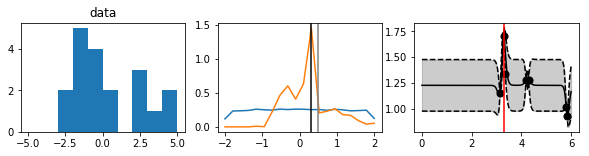

Taking Data...
Calculate Posterior...
Best Theta:  0.3
Design Next Experiment...
2017-06-08 18:55:04.293697 EIG via 4 parallel experiments with [theta,phi] 0.3 5.80217903408
2017-06-08 18:55:15.455891 EIG via 4 parallel experiments with [theta,phi] 0.3 3.28339349505
2017-06-08 18:55:26.554231 EIG via 4 parallel experiments with [theta,phi] 0.3 5.83610615979
2017-06-08 18:55:38.337709 EIG via 4 parallel experiments with [theta,phi] 0.3 4.28889596205
2017-06-08 18:55:50.421598 EIG via 4 parallel experiments with [theta,phi] 0.3 4.18637294758
2017-06-08 18:56:05.107161 EIG via 4 parallel experiments with [theta,phi] 0.3 4.38958198202
2017-06-08 18:56:18.035741 EIG via 4 parallel experiments with [theta,phi] 0.3 4.27461335725
Next Phi:  [3.2833934950543338]


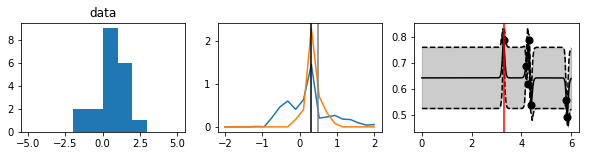

Taking Data...
Calculate Posterior...
Best Theta:  0.3
Design Next Experiment...
2017-06-08 18:56:31.965592 EIG via 4 parallel experiments with [theta,phi] 0.3 5.80217903408
2017-06-08 18:56:41.908022 EIG via 4 parallel experiments with [theta,phi] 0.3 3.28339349505
2017-06-08 18:56:52.857806 EIG via 4 parallel experiments with [theta,phi] 0.3 5.83610615979
2017-06-08 18:57:03.614309 EIG via 4 parallel experiments with [theta,phi] 0.3 4.28889596205
2017-06-08 18:57:16.491489 EIG via 4 parallel experiments with [theta,phi] 0.3 4.18637294758
2017-06-08 18:57:31.680879 EIG via 4 parallel experiments with [theta,phi] 0.3 2.29012870754
2017-06-08 18:57:50.826289 EIG via 4 parallel experiments with [theta,phi] 0.3 3.41127027245
Next Phi:  [3.2833934950543338]


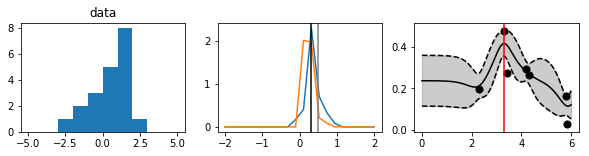

Taking Data...
Calculate Posterior...
Best Theta:  0.3
Design Next Experiment...
2017-06-08 18:58:07.931341 EIG via 4 parallel experiments with [theta,phi] 0.3 5.80217903408
2017-06-08 18:58:17.411682 EIG via 4 parallel experiments with [theta,phi] 0.3 3.28339349505
2017-06-08 18:58:26.607689 EIG via 4 parallel experiments with [theta,phi] 0.3 5.83610615979
2017-06-08 18:58:36.911995 EIG via 4 parallel experiments with [theta,phi] 0.3 4.28889596205
2017-06-08 18:58:51.062476 EIG via 4 parallel experiments with [theta,phi] 0.3 4.18637294758
2017-06-08 18:59:03.600809 EIG via 4 parallel experiments with [theta,phi] 0.3 3.30832100046
2017-06-08 18:59:14.345995 EIG via 4 parallel experiments with [theta,phi] 0.3 3.10060808284
Next Phi:  [3.2833934950543338]


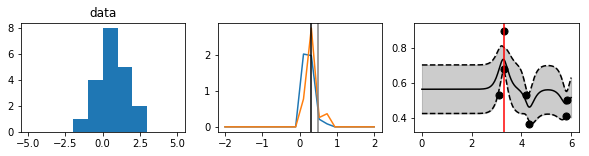

In [12]:
# initial experimental settings and uninformative prior
loop_phi = 0
loop_prior = distr.Distribution('prior',range = model.THETA_RANGE)

science_history = []
N_SCIENCE_ITERATIONS = 4
for i in range(N_SCIENCE_ITERATIONS):
    plt.clf()

    fig,axarr = plt.subplots(1,3)
    fig.set_size_inches(10,2)
    axarr[0].set_title('data')
    
    ## 1. Perform Experiment
    loop_data = collect_data(loop_phi,science_ndata)
    plots.plot_data(loop_data,model.DATA_RANGE, ax = axarr[0])

    ## 2. Calculate the Posterior
    loop_posterior, loop_best_theta = calculate_posterior(loop_prior,loop_data,loop_phi)
    plots.plot_posterior(loop_prior,loop_posterior,loop_best_theta,science_theta_nature, model.THETA_RANGE, ax = axarr[1])

    ## 3. Design Next Experiment
    loop_res_gp, loop_next_phi = design_next_experiment(loop_posterior)

    plots.plot_bayes(loop_res_gp,phi_range = model.PHI_RANGE, ax = axarr[2])
    plt.show()


    science_history.append([loop_data,loop_prior,loop_posterior,loop_best_theta,science_theta_nature,loop_res_gp])
    
    ## 5. Update our Prior and experimental settings
    loop_prior = loop_posterior
    loop_phi   = loop_next_phi